In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wrn
import json
from utils.preprocess_data import decode_JSON, filterByArtist, track_count
wrn.filterwarnings('ignore', category = DeprecationWarning) 
wrn.filterwarnings('ignore', category = FutureWarning) 
wrn.filterwarnings('ignore', category = UserWarning)
wrn.filterwarnings('ignore', category = RuntimeWarning)

Referensi : 
- https://www.reddit.com/r/datascience/comments/owyw1i/do_any_of_you_understand_this_inference_label_got/
- https://towardsdatascience.com/how-to-convert-json-into-a-pandas-dataframe-100b2ae1e0d8
- https://towardsdatascience.com/all-pandas-json-normalize-you-should-know-for-flattening-json-13eae1dfb7dd
- https://towardsdatascience.com/how-to-use-multiindex-in-pandas-to-level-up-your-analysis-aeac7f451fce
- https://support.spotify.com/us/article/understanding-my-data/

### Explore Spotify Personal Data Library and Streaming History 2020 & 2021 

## Explore Library 

In [ ]:
# def decode_JSON(data_path, encode='utf-8'):
#     return json.load(open(data_path, encoding=encode))

In [3]:
data = decode_JSON('MyData/YourLibrary.json')

In [4]:
data

{'tracks': [{'artist': 'Avicii',
   'album': 'Stories',
   'track': 'Somewhere In Stockholm',
   'uri': 'spotify:track:4t1K83gzhMdP4oZzVpA9ji'},
  {'artist': 'TUYU',
   'album': "It's Raining After All",
   'track': "I'm getting on the bus to the other world, see ya!",
   'uri': 'spotify:track:3rCJptQKkXrTx6qUXqz7dD'},
  {'artist': 'Anji',
   'album': 'DIA',
   'track': 'Dia - Hits Single',
   'uri': 'spotify:track:2ok6IGh97S4eIRse9K2sjg'},
  {'artist': 'Avicii',
   'album': 'Stories',
   'track': 'Trouble',
   'uri': 'spotify:track:79x6Ab5tMDGQeXnzjQN5lO'},
  {'artist': 'balloon',
   'album': 'Corridor',
   'track': 'Charles',
   'uri': 'spotify:track:5a3hAr4yUHBwk3xmIOoDRB'},
  {'artist': 'Avicii',
   'album': 'The Days / Nights',
   'track': 'The Days',
   'uri': 'spotify:track:7HW01sQy5UOxyezzZg98nd'},
  {'artist': 'Martin Garrix',
   'album': "Now That I've Found You (feat. John & Michel)",
   'track': "Now That I've Found You (feat. John & Michel)",
   'uri': 'spotify:track:7wZor

In [6]:
df_nested_list = pd.json_normalize(data, record_path =['tracks'])
df_nested_list.head()

,artist,album,track,uri
0,Avicii,Stories,Somewhere In Stockholm,spotify:track:4t1K83gzhMdP4oZzVpA9ji
1,TUYU,It's Raining After All,"I'm getting on the bus to the other world, see...",spotify:track:3rCJptQKkXrTx6qUXqz7dD
2,Anji,DIA,Dia - Hits Single,spotify:track:2ok6IGh97S4eIRse9K2sjg
3,Avicii,Stories,Trouble,spotify:track:79x6Ab5tMDGQeXnzjQN5lO
4,balloon,Corridor,Charles,spotify:track:5a3hAr4yUHBwk3xmIOoDRB


In [7]:
# df_nested_list = pd.json_normalize(data, record_path =['tracks'])
df_nested_list = df_nested_list.drop('uri', axis=1)

In [8]:
df_nested_list

,artist,album,track
0,Avicii,Stories,Somewhere In Stockholm
1,TUYU,It's Raining After All,"I'm getting on the bus to the other world, see..."
2,Anji,DIA,Dia - Hits Single
3,Avicii,Stories,Trouble
4,balloon,Corridor,Charles
...,...,...,...
174,Silampukau,"Dosa, Kota, & Kenangan",Puan Kelana
175,Calvin Harris,This Is What You Came For (feat. Rihanna),This Is What You Came For (feat. Rihanna)
176,Cash Cash,"Blood, Sweat & 3 Years",Sweat (feat. Jenna Andrews)
177,hololive IDOL PROJECT,Kirameki Rider,Kirameki Rider


# Cek Artist 

In [9]:
np.sort(df_nested_list['artist'].unique())

array(['A Day To Remember', 'ASIAN KUNG-FU GENERATION', 'Afterglow',
       'Alan Walker', 'Anji', 'Architects', 'Arctic Monkeys',
       'Atmosphere', 'Avicii', 'Bring Me The Horizon', 'Cakra Khan',
       'Calvin Harris', 'Cash Cash', 'Coldplay', 'Creepy Nuts',
       'Digital Farm Animals', 'Dody BJ', 'Dream Theater', 'EDEN', 'Eve',
       'FUTURE FOUNDATION', 'Florence + The Machine', 'Galantis',
       'Goose house', 'Happy Asmara', 'I Prevail', 'Isyana Sarasvati',
       'Kami-sama, I have noticed', 'Koresawa', 'KuroUsa', 'Kygo',
       'Led Zeppelin', 'Major Lazer', 'Marger', 'Marshmello',
       'Martin Garrix', 'Mikito P', 'Mustard', 'Neru', 'OneRepublic',
       'Park Hyo Shin', 'Pas Band', 'Passion Pit', 'Pastel*Palettes',
       'PinocchioP', "Poppin'Party", 'Prince Fox', 'RAISE A SUILEN',
       'Rain Man', 'Raisa', 'Robokosan', 'Roselia', 'SEKAI NO OWARI',
       'STEREO DIVE FOUNDATION', 'SUSHIBOYS', 'Sakanaction',
       'Sangatsu no Phantasia', 'Shawn Mendes', 'Silampu

## Create Function to Filter by Artist 

In [10]:
# def filterByArtist(artist_name):
#     return df_nested_list[df_nested_list['artist'] == artist_name]

## Sampling Ambil 5 Artist 

In [11]:
df_cash = filterByArtist(df_nested_list, 'Cash Cash')

In [12]:
df_cash

,artist,album,track
20,Cash Cash,"Blood, Sweat & 3 Years",Arrows in the Dark (feat. Anjulie)
32,Cash Cash,How to Love (feat. Sofia Reyes),How to Love (feat. Sofia Reyes)
59,Cash Cash,"Blood, Sweat & 3 Years",Bada Boom
97,Cash Cash,"Blood, Sweat & 3 Years",We Will Live (feat. Night Terrors of 1927)
107,Cash Cash,"Blood, Sweat & 3 Years","The Gun (feat. Trinidad James, Dev & Chrish)"
108,Cash Cash,"Blood, Sweat & 3 Years","Devil (feat. Busta Rhymes, B.o.B & Neon Hitch)"
117,Cash Cash,"Blood, Sweat & 3 Years",How to Love (feat. Sofia Reyes)
119,Cash Cash,"Blood, Sweat & 3 Years",Turn (feat. Little Daylight)
128,Cash Cash,"Blood, Sweat & 3 Years",Hero (feat. Christina Perri)
131,Cash Cash,"Blood, Sweat & 3 Years",Escarole


In [13]:
df_avicii = filterByArtist(df_nested_list, 'Avicii')

In [14]:
df_avicii

,artist,album,track
0,Avicii,Stories,Somewhere In Stockholm
3,Avicii,Stories,Trouble
5,Avicii,The Days / Nights,The Days
9,Avicii,Stories,Touch Me
16,Avicii,Stories,For A Better Day
22,Avicii,Stories,Waiting For Love
34,Avicii,Stories,Can't Catch Me
48,Avicii,Stories,City Lights
49,Avicii,Stories,Sunset Jesus
55,Avicii,Stories,Pure Grinding


In [15]:
df_creepy = filterByArtist(df_nested_list, 'Creepy Nuts')

In [16]:
df_creepy

,artist,album,track
33,Creepy Nuts,かつて天才だった俺たちへ,かつて天才だった俺たちへ


In [17]:
df_archi = filterByArtist(df_nested_list, 'Architects')

In [18]:
df_archi

,artist,album,track
47,Architects,Holy Hell,Royal Beggars


In [19]:
df_holo = filterByArtist(df_nested_list, 'hololive IDOL PROJECT')

In [20]:
df_holo

,artist,album,track
31,hololive IDOL PROJECT,キラメキライダー☆,キラメキライダー☆
42,hololive IDOL PROJECT,夢見る空へ,夢見る空へ
44,hololive IDOL PROJECT,Shiny Smily Story,Shiny Smily Story
67,hololive IDOL PROJECT,Shiny Smily Story,Shiny Smily Story
141,hololive IDOL PROJECT,Yumemiru Sora He,Yumemiru Sora He
148,hololive IDOL PROJECT,Suspect,Suspect
177,hololive IDOL PROJECT,Kirameki Rider,Kirameki Rider


## Ada beberapa yang agak aneh di bagian album nya, kita sorting terlebih dahulu beberapa 

In [21]:
df_cash = df_cash.sort_values(by=['album'])

In [22]:
df_cash

,artist,album,track
20,Cash Cash,"Blood, Sweat & 3 Years",Arrows in the Dark (feat. Anjulie)
59,Cash Cash,"Blood, Sweat & 3 Years",Bada Boom
97,Cash Cash,"Blood, Sweat & 3 Years",We Will Live (feat. Night Terrors of 1927)
107,Cash Cash,"Blood, Sweat & 3 Years","The Gun (feat. Trinidad James, Dev & Chrish)"
108,Cash Cash,"Blood, Sweat & 3 Years","Devil (feat. Busta Rhymes, B.o.B & Neon Hitch)"
117,Cash Cash,"Blood, Sweat & 3 Years",How to Love (feat. Sofia Reyes)
119,Cash Cash,"Blood, Sweat & 3 Years",Turn (feat. Little Daylight)
128,Cash Cash,"Blood, Sweat & 3 Years",Hero (feat. Christina Perri)
131,Cash Cash,"Blood, Sweat & 3 Years",Escarole
132,Cash Cash,"Blood, Sweat & 3 Years",Take Me Home (feat. Bebe Rexha)


In [23]:
df_avicii = df_avicii.sort_values(by=['album'])
df_avicii

,artist,album,track
0,Avicii,Stories,Somewhere In Stockholm
3,Avicii,Stories,Trouble
9,Avicii,Stories,Touch Me
16,Avicii,Stories,For A Better Day
22,Avicii,Stories,Waiting For Love
34,Avicii,Stories,Can't Catch Me
48,Avicii,Stories,City Lights
49,Avicii,Stories,Sunset Jesus
55,Avicii,Stories,Pure Grinding
85,Avicii,Stories,Talk To Myself


## Multi Index / Grouping Berdasarkan Album dan di counting by track per album nya, agar lebih bagus 

In [24]:
multi_cash = df_cash.set_index(['artist', 'album', 'track'])

In [25]:
multi_cash

Empty DataFrame
Columns: []
Index: [(Cash Cash, Blood, Sweat & 3 Years, Arrows in the Dark (feat. Anjulie)), (Cash Cash, Blood, Sweat & 3 Years, Bada Boom), (Cash Cash, Blood, Sweat & 3 Years, We Will Live (feat. Night Terrors of 1927)), (Cash Cash, Blood, Sweat & 3 Years, The Gun (feat. Trinidad James, Dev & Chrish)), (Cash Cash, Blood, Sweat & 3 Years, Devil (feat. Busta Rhymes, B.o.B & Neon Hitch)), (Cash Cash, Blood, Sweat & 3 Years, How to Love (feat. Sofia Reyes)), (Cash Cash, Blood, Sweat & 3 Years, Turn (feat. Little Daylight)), (Cash Cash, Blood, Sweat & 3 Years, Hero (feat. Christina Perri)), (Cash Cash, Blood, Sweat & 3 Years, Escarole), (Cash Cash, Blood, Sweat & 3 Years, Take Me Home (feat. Bebe Rexha)), (Cash Cash, Blood, Sweat & 3 Years, Surrender), (Cash Cash, Blood, Sweat & 3 Years, Aftershock (feat. Jacquie)), (Cash Cash, Blood, Sweat & 3 Years, Broken Drum (feat. Fitz of Fitz and the Tantrums)), (Cash Cash, Blood, Sweat & 3 Years, Lightning (feat. John Rzeznik)), (Cash Cash, Blood, Sweat & 3 Years, Sweat (feat. Jenna Andrews)), (Cash Cash, How to Love (feat. Sofia Reyes), How to Love (feat. Sofia Reyes))]

In [ ]:
# def track_count(df_name):
#     return df_name.groupby(['artist', 'album']).count()



In [ ]:
count_cash = df_cash.groupby(['artist', 'album']).count()
count_cash

In [26]:
count_cash = track_count(df_cash)
count_cash

track
artist    album                                 
Cash Cash Blood, Sweat & 3 Years              15
          How to Love (feat. Sofia Reyes)      1

In [27]:
df_avicii

,artist,album,track
0,Avicii,Stories,Somewhere In Stockholm
3,Avicii,Stories,Trouble
9,Avicii,Stories,Touch Me
16,Avicii,Stories,For A Better Day
22,Avicii,Stories,Waiting For Love
34,Avicii,Stories,Can't Catch Me
48,Avicii,Stories,City Lights
49,Avicii,Stories,Sunset Jesus
55,Avicii,Stories,Pure Grinding
85,Avicii,Stories,Talk To Myself


In [28]:
multi_avicii = df_avicii.set_index(['artist', 'album','track'])
multi_avicii

Empty DataFrame
Columns: []
Index: [(Avicii, Stories, Somewhere In Stockholm), (Avicii, Stories, Trouble), (Avicii, Stories, Touch Me), (Avicii, Stories, For A Better Day), (Avicii, Stories, Waiting For Love), (Avicii, Stories, Can't Catch Me), (Avicii, Stories, City Lights), (Avicii, Stories, Sunset Jesus), (Avicii, Stories, Pure Grinding), (Avicii, Stories, Talk To Myself), (Avicii, Stories, Ten More Days), (Avicii, Stories, For A Better Day), (Avicii, Stories, Broken Arrows), (Avicii, Stories, Gonna Love Ya), (Avicii, Stories, True Believer), (Avicii, The Days / Nights, The Days)]

In [29]:
count_aviciii = track_count(df_avicii)
count_aviciii

track
artist album                   
Avicii Stories               15
       The Days / Nights      1

In [30]:
df_creepy

,artist,album,track
33,Creepy Nuts,かつて天才だった俺たちへ,かつて天才だった俺たちへ


In [31]:
df_creepy_tl = df_creepy.copy()

In [32]:
df_creepy_tl

,artist,album,track
33,Creepy Nuts,かつて天才だった俺たちへ,かつて天才だった俺たちへ


In [33]:
multi_creepy = df_creepy_tl.set_index(['artist', 'album', 'track'])
multi_creepy

,,
artist,album,track
Creepy Nuts,かつて天才だった俺たちへ,かつて天才だった俺たちへ


In [34]:
df_creepy_tl['album'].replace({
    'かつて天才だった俺たちへ':'Katsute Tensai datta Oretachi'
}, inplace=True)

In [35]:
df_creepy_tl['track'].replace({
    'かつて天才だった俺たちへ':'Katsute Tensai datta Oretachi'
}, inplace=True)

In [36]:
df_creepy_tl.groupby(['artist', 'album']).count()

,,track
artist,album,
Creepy Nuts,Katsute Tensai datta Oretachi,1


In [37]:
df_creepy_tl

,artist,album,track
33,Creepy Nuts,Katsute Tensai datta Oretachi,Katsute Tensai datta Oretachi


In [38]:
df_archi

,artist,album,track
47,Architects,Holy Hell,Royal Beggars


In [39]:
multi_archi = df_archi.set_index(['artist', 'album','track'])

In [40]:
multi_archi

,,
artist,album,track
Architects,Holy Hell,Royal Beggars


In [41]:
count_archi = track_count(df_archi)
count_archi

,,track
artist,album,
Architects,Holy Hell,1


In [42]:
df_holo

,artist,album,track
31,hololive IDOL PROJECT,キラメキライダー☆,キラメキライダー☆
42,hololive IDOL PROJECT,夢見る空へ,夢見る空へ
44,hololive IDOL PROJECT,Shiny Smily Story,Shiny Smily Story
67,hololive IDOL PROJECT,Shiny Smily Story,Shiny Smily Story
141,hololive IDOL PROJECT,Yumemiru Sora He,Yumemiru Sora He
148,hololive IDOL PROJECT,Suspect,Suspect
177,hololive IDOL PROJECT,Kirameki Rider,Kirameki Rider


In [43]:
df_holo_tl = df_holo.copy()

In [44]:
df_holo_tl

,artist,album,track
31,hololive IDOL PROJECT,キラメキライダー☆,キラメキライダー☆
42,hololive IDOL PROJECT,夢見る空へ,夢見る空へ
44,hololive IDOL PROJECT,Shiny Smily Story,Shiny Smily Story
67,hololive IDOL PROJECT,Shiny Smily Story,Shiny Smily Story
141,hololive IDOL PROJECT,Yumemiru Sora He,Yumemiru Sora He
148,hololive IDOL PROJECT,Suspect,Suspect
177,hololive IDOL PROJECT,Kirameki Rider,Kirameki Rider


In [45]:
df_holo_tl['album'].replace({
    'キラメキライダー☆':'Kirameki Rider',
    '夢見る空へ':'Yumemiru Sora He'
}, inplace=True)

In [46]:
df_holo_tl['track'].replace({
    'キラメキライダー☆':'Kirameki Rider',
    '夢見る空へ':'Yumemiru Sora He'
}, inplace=True)

In [47]:
df_holo_tl

,artist,album,track
31,hololive IDOL PROJECT,Kirameki Rider,Kirameki Rider
42,hololive IDOL PROJECT,Yumemiru Sora He,Yumemiru Sora He
44,hololive IDOL PROJECT,Shiny Smily Story,Shiny Smily Story
67,hololive IDOL PROJECT,Shiny Smily Story,Shiny Smily Story
141,hololive IDOL PROJECT,Yumemiru Sora He,Yumemiru Sora He
148,hololive IDOL PROJECT,Suspect,Suspect
177,hololive IDOL PROJECT,Kirameki Rider,Kirameki Rider


### Humu humu ada duplicated value

In [48]:
df_holo_tl.duplicated().sum()

3

In [49]:
df_holo_tl.drop_duplicates(inplace=True)

In [50]:
multi_holo = df_holo_tl.set_index(['artist', 'album'])
multi_holo

track
artist                album                               
hololive IDOL PROJECT Kirameki Rider        Kirameki Rider
                      Yumemiru Sora He    Yumemiru Sora He
                      Shiny Smily Story  Shiny Smily Story
                      Suspect                      Suspect

In [51]:
count_holo = track_count(df_holo_tl)
count_holo

track
artist                album                   
hololive IDOL PROJECT Kirameki Rider         1
                      Shiny Smily Story      1
                      Suspect                1
                      Yumemiru Sora He       1

In [52]:
new_data = {
    'Artist' : ['Cash Cash',
               'Avicii',
               'Creepy Nuts',
               'Architects',
               'Hololive Idol Project'],
    'Total Lagu' : [16, 16, 1, 1, 4] 
}

In [53]:
total = pd.DataFrame(new_data)
total.sort_values('Total Lagu', ascending=False)

,Artist,Total Lagu
0,Cash Cash,16
1,Avicii,16
4,Hololive Idol Project,4
2,Creepy Nuts,1
3,Architects,1


## Cek Podcast 

In [54]:
df_podcast = pd.json_normalize(data, record_path =['shows'])
df_podcast

,name,publisher,uri
0,DataPods,Data Science Indonesia,spotify:show:356i7xRQBUFukuL25UKsf1
1,Tentang Data,Ali Akbar,spotify:show:68M1vH2k21fsTFibovdYWl


## Explore Streaming History

In [55]:
DATA_PATH = 'MyData/'

In [56]:
df_stream = pd.read_json(os.path.join(DATA_PATH, 'StreamingHistory0.json'))
df_stream
# print(df4.shape)

,endTime,artistName,trackName,msPlayed
0,2020-06-03 01:07,ONE OK ROCK,The Beginning,21826
1,2020-07-18 09:15,Park Hyo Shin,"The Day (From ""Mr. Sunshine [Original Televisi...",120956
2,2020-07-31 14:12,Park Hyo Shin,눈의 꽃,2021
3,2020-08-04 08:11,Yunomi,星降る夜のアデニウ,3531
4,2020-08-05 18:04,Goro Majima(Hidenari Ugaki),24-hour Cinderella - Full Spec Edition,3029
...,...,...,...,...
3683,2021-08-05 15:58,Harris Cole,Matt,182690
3684,2021-08-05 16:01,Harris Cole,Matt,145129
3685,2021-08-05 16:03,HOMESHAKE,Fresh Air,166176
3686,2021-08-05 16:09,Aya Anjani,Juwita,314603


In [57]:
np.sort(df_stream['artistName'].unique())

array(['164', '1986 Omega Tribe', '23.exe', '40mP', 'A Day To Remember',
       'AKINO', 'AKMU', 'ASIAN KUNG-FU GENERATION', 'ATOLS',
       'Abroad in Japan', 'Acha Septriasa', 'Ada Band', 'Afterglow',
       'Agatha Chelsea', 'Aimer', 'Aimyon', 'Alan Walker',
       'Alice In Chains', 'Ami Ozaki', 'Amigdala', 'Andien', 'Andmesh',
       'Andra Kharisma', 'Anri', 'Architects', 'Ardhito Pramono',
       'Ari Lasso', 'Ariel', 'Armada', 'Avicii', 'Aya Anjani',
       'BABYMETAL', 'BAP.', 'BASI', 'BID', 'BIGHEAD', 'BIM', 'BLACKPINK',
       'BUZZ', 'Babe', 'Baharit$', 'Banda Neira', 'Base Ball Bear',
       'Beau Diako', 'Beckett', 'Big Sean', 'Blu-Swing',
       'Brand of Sacrifice', 'Bring Me The Horizon', 'Budi Doremi',
       'Busker Busker', 'CASIOPEA', 'CVX', 'Calvin Jeremy',
       'Candra Darusman', 'Cash Cash', 'Cazenrrique', 'Celine & Nadya',
       'Chouchou-P', 'Coldiac', 'Coldplay', 'Coolio', 'Cortex',
       'Creepy Nuts', 'Crusher-P', 'Crystal Lake', 'DAY6', 'DECO*27',
    

In [58]:
print(f"Total Unique Artist in 2020 - 2021 : {df_stream['artistName'].nunique()} Artists")

Total Unique Artist in 2020 - 2021 : 410 Artists


In [59]:
df_stream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3688 entries, 0 to 3687
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endTime     3688 non-null   object
 1   artistName  3688 non-null   object
 2   trackName   3688 non-null   object
 3   msPlayed    3688 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 115.4+ KB


In [60]:
df_stream = df_stream.drop(['msPlayed'],axis=1)

In [61]:
df_stream

,endTime,artistName,trackName
0,2020-06-03 01:07,ONE OK ROCK,The Beginning
1,2020-07-18 09:15,Park Hyo Shin,"The Day (From ""Mr. Sunshine [Original Televisi..."
2,2020-07-31 14:12,Park Hyo Shin,눈의 꽃
3,2020-08-04 08:11,Yunomi,星降る夜のアデニウ
4,2020-08-05 18:04,Goro Majima(Hidenari Ugaki),24-hour Cinderella - Full Spec Edition
...,...,...,...
3683,2021-08-05 15:58,Harris Cole,Matt
3684,2021-08-05 16:01,Harris Cole,Matt
3685,2021-08-05 16:03,HOMESHAKE,Fresh Air
3686,2021-08-05 16:09,Aya Anjani,Juwita


## Explore 2020 

In [62]:
df_stream_2020 = df_stream[df_stream['endTime'] <= '2020-12-31']

In [63]:
df_stream_2020

,endTime,artistName,trackName
0,2020-06-03 01:07,ONE OK ROCK,The Beginning
1,2020-07-18 09:15,Park Hyo Shin,"The Day (From ""Mr. Sunshine [Original Televisi..."
2,2020-07-31 14:12,Park Hyo Shin,눈의 꽃
3,2020-08-04 08:11,Yunomi,星降る夜のアデニウ
4,2020-08-05 18:04,Goro Majima(Hidenari Ugaki),24-hour Cinderella - Full Spec Edition
...,...,...,...
988,2020-12-27 14:04,Laze,Teman Lama
989,2020-12-27 14:08,Laze,Pertanda Baik
990,2020-12-27 14:09,Laze,Turun Dari Langit
991,2020-12-29 11:10,Baharit$,"Ma$a, Pt. 2"


In [67]:
np.sort(df_stream_2020['artistName'].unique())

array(['A Day To Remember', 'ASIAN KUNG-FU GENERATION', 'Aimer',
       'Alan Walker', 'Alice In Chains', 'Andra Kharisma', 'Architects',
       'Avicii', 'BAP.', 'BASI', 'BIM', 'Baharit$', 'Base Ball Bear',
       'Bring Me The Horizon', 'Cash Cash', 'Coldplay', 'Creepy Nuts',
       'Crystal Lake', 'DJ HASEBE', 'Dengaryu', 'Denny Caknan',
       'Didi Kempot', 'EDEN', 'EVISBEATS', 'Enjoy Music Club', 'FLOW',
       'Fiersa Besari', 'Florence + The Machine', 'Fourtwnty',
       'Friday Night Plans', 'Galantis', 'Goro Majima(Hidenari Ugaki)',
       'Gryffin', 'Happy Asmara', 'Helsinki Lambda Club', 'H△G', 'ILUX',
       'IN-SIST', 'KID FRESINO', 'KOTONOHOUSE', 'KYUHYUN', 'Kan Sano',
       'Kid Cudi', 'Kim Jong Kook', 'King Gnu', 'Kiro Akiyama',
       'Koresawa', 'Kygo', 'LUCKY TAPES', 'Laze', 'Lund', 'Macklemore',
       'Major Lazer', 'Marger', 'Marshmello', 'Martin Garrix',
       'Mega Shinnosuke', 'Mike Perry', 'Mili', 'NDX A.K.A.',
       'Nariaki Obukuro', 'Neru', 'ONE OK ROCK

In [68]:
print(f"Total Unique Artist in 2020 : {df_stream_2020['artistName'].nunique()} Artists")

Total Unique Artist in 2020 : 111 Artists


### Translate Process

In [69]:
df_stream_2020_tl = df_stream_2020.copy()

In [70]:
df_stream_2020_tl[df_stream_2020_tl['artistName'] == '星街すいせい']

,endTime,artistName,trackName
15,2020-08-06 08:43,星街すいせい,NEXT COLOR PLANET
25,2020-08-09 14:04,星街すいせい,NEXT COLOR PLANET
150,2020-08-25 12:12,星街すいせい,NEXT COLOR PLANET
157,2020-08-28 06:39,星街すいせい,NEXT COLOR PLANET
166,2020-08-28 14:13,星街すいせい,NEXT COLOR PLANET
195,2020-09-08 06:00,星街すいせい,NEXT COLOR PLANET
202,2020-09-08 12:16,星街すいせい,NEXT COLOR PLANET
226,2020-09-10 06:32,星街すいせい,NEXT COLOR PLANET
304,2020-09-15 18:02,星街すいせい,NEXT COLOR PLANET


In [71]:
df_stream_2020_tl['artistName'].replace({
    '真島吾朗(宇垣秀成)': 'Goro Majima(Hidenari Ugaki)',
    '星街すいせい': 'Hoshimachi Suisei',
    '宝鐘マリン': 'Houshou Marine',
    '美波': 'Minami',
    '白上フブキ': 'Shirakami Fubuki'
}, inplace=True)

In [72]:
df_stream_2020_tl['artistName'].value_counts()

ASIAN KUNG-FU GENERATION    95
hololive IDOL PROJECT       90
Helsinki Lambda Club        78
ZUTOMAYO                    63
Aimer                       58
                            ..
Minami                       1
Dengaryu                     1
A Day To Remember            1
BAP.                         1
Shirakami Fubuki             1
Name: artistName, Length: 110, dtype: int64

In [73]:
counts_2020_tl = df_stream_2020_tl['artistName'].value_counts()
counts_2020_tl

ASIAN KUNG-FU GENERATION    95
hololive IDOL PROJECT       90
Helsinki Lambda Club        78
ZUTOMAYO                    63
Aimer                       58
                            ..
Minami                       1
Dengaryu                     1
A Day To Remember            1
BAP.                         1
Shirakami Fubuki             1
Name: artistName, Length: 110, dtype: int64

In [74]:
top_20_2020_tl = counts_2020_tl[:20, ]
top_20_2020_tl

ASIAN KUNG-FU GENERATION    95
hololive IDOL PROJECT       90
Helsinki Lambda Club        78
ZUTOMAYO                    63
Aimer                       58
Crystal Lake                40
Yunomi                      37
Park Hyo Shin               36
Architects                  31
Tia                         30
Robokosan                   22
EDEN                        21
NDX A.K.A.                  20
Snail's House               20
Laze                        19
Padi                        17
Bring Me The Horizon        15
Creepy Nuts                 14
Avicii                      12
Houshou Marine              12
Name: artistName, dtype: int64

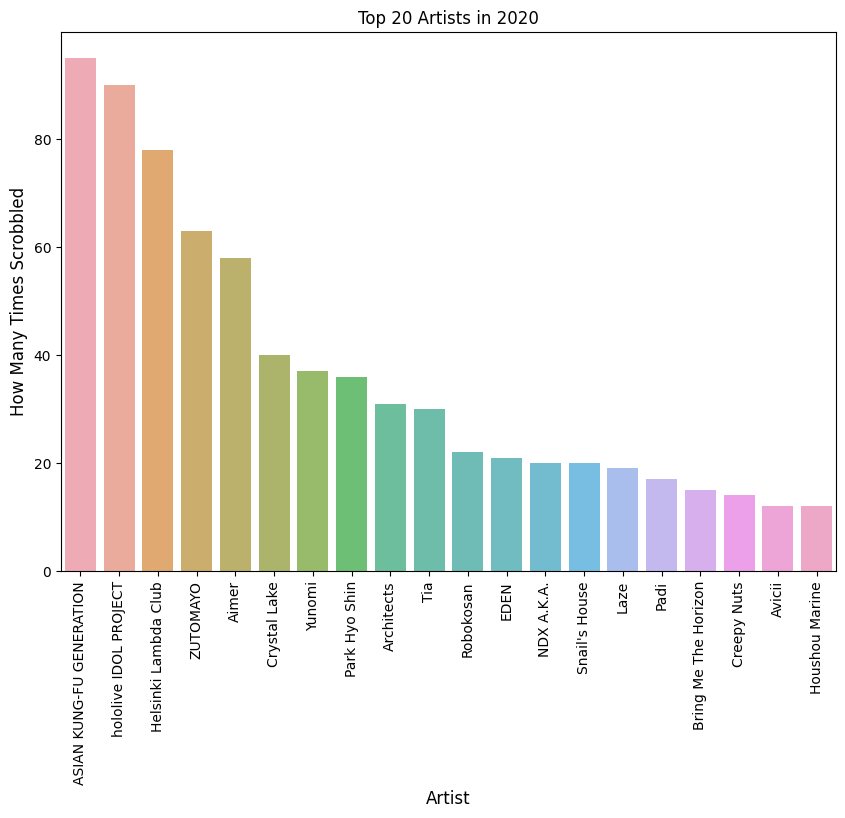

In [75]:
plt.figure(figsize=(10,7))
sns.barplot(top_20_2020_tl.index, top_20_2020_tl.values, alpha=0.8)
# plt.stem(top_20_2020_tl.index, top_20_2020_tl.values)
plt.title('Top 20 Artists in 2020')
plt.ylabel('How Many Times Scrobbled', fontsize=12)
plt.xticks(rotation=90)
plt.xlabel('Artist', fontsize=12)
plt.show()

In [76]:
print(counts_2020_tl[-5:, ])

Minami               1
Dengaryu             1
A Day To Remember    1
BAP.                 1
Shirakami Fubuki     1
Name: artistName, dtype: int64


## Explore 2021 

In [77]:
df_stream_2021 = df_stream[df_stream['endTime'] >= '2021-01-01']

In [78]:
df_stream_2021

,endTime,artistName,trackName
1027,2021-01-02 11:26,hachi,砂の惑星 feat.初音ミク
1028,2021-01-02 11:30,Hachioji P,Weekender Girl
1029,2021-01-02 11:33,livetune,Yellow - Re:Dialed
1030,2021-01-02 11:37,n-buna,ウミユリ海底譚
1031,2021-01-02 14:00,Mikito P,ロキ
...,...,...,...
3683,2021-08-05 15:58,Harris Cole,Matt
3684,2021-08-05 16:01,Harris Cole,Matt
3685,2021-08-05 16:03,HOMESHAKE,Fresh Air
3686,2021-08-05 16:09,Aya Anjani,Juwita


In [79]:
np.sort(df_stream_2021['artistName'].unique())

array(['164', '1986 Omega Tribe', '23.exe', '40mP', 'AKINO', 'AKMU',
       'ASIAN KUNG-FU GENERATION', 'ATOLS', 'Abroad in Japan',
       'Acha Septriasa', 'Ada Band', 'Afterglow', 'Agatha Chelsea',
       'Aimer', 'Aimyon', 'Ami Ozaki', 'Amigdala', 'Andien', 'Andmesh',
       'Anri', 'Architects', 'Ardhito Pramono', 'Ari Lasso', 'Ariel',
       'Armada', 'Aya Anjani', 'BABYMETAL', 'BID', 'BIGHEAD', 'BLACKPINK',
       'BUZZ', 'Babe', 'Banda Neira', 'Beau Diako', 'Beckett', 'Big Sean',
       'Blu-Swing', 'Brand of Sacrifice', 'Bring Me The Horizon',
       'Budi Doremi', 'Busker Busker', 'CASIOPEA', 'CVX', 'Calvin Jeremy',
       'Candra Darusman', 'Cazenrrique', 'Celine & Nadya', 'Chouchou-P',
       'Coldiac', 'Coldplay', 'Coolio', 'Cortex', 'Creepy Nuts',
       'Crusher-P', 'Crystal Lake', 'DAY6', 'DECO*27', 'DJ Haning',
       'DJ Khaled', 'DPR LIVE', 'Daramuda', 'DataPods',
       "Dato' Sheila Majid", 'Denny Caknan', 'Desiigner', 'Dewa 19',
       'Dialog Senja', 'Dios/signalP

In [81]:
print(f"Total Unique Artist in 2021 : {df_stream_2021['artistName'].nunique()} Artists")

Total Unique Artist in 2021 : 337 Artists


### Translate Process 

In [82]:
df_stream_2021_tl = df_stream_2021.copy()

In [83]:
df_stream_2021_tl

,endTime,artistName,trackName
1027,2021-01-02 11:26,hachi,砂の惑星 feat.初音ミク
1028,2021-01-02 11:30,Hachioji P,Weekender Girl
1029,2021-01-02 11:33,livetune,Yellow - Re:Dialed
1030,2021-01-02 11:37,n-buna,ウミユリ海底譚
1031,2021-01-02 14:00,Mikito P,ロキ
...,...,...,...
3683,2021-08-05 15:58,Harris Cole,Matt
3684,2021-08-05 16:01,Harris Cole,Matt
3685,2021-08-05 16:03,HOMESHAKE,Fresh Air
3686,2021-08-05 16:09,Aya Anjani,Juwita


In [84]:
df_stream_2021_tl['artistName'].replace({
    'ハロー、ハッピーワールド!': 'Hello, Happy World!', 
    '宝鐘マリン': 'Houshou Marine',
    '星街すいせい': 'Hoshimachi Suisei',
    '猫又おかゆ': 'Nekomata Okayu',
    '秋元薫': 'Kaoru Akimoto',
    '花園たえ(CV.大塚紗英)': 'Tae Hanazono',
    '香澄': 'Kasumi Toyama'
}, inplace=True)

In [85]:
counts_2021_tl = df_stream_2021_tl['artistName'].value_counts()
counts_2021_tl

SG Wannabe             240
PinocchioP             139
Park Hyo Shin          117
YOASOBI                 91
Hello, Happy World!     82
                      ... 
Marika Takeuchi          1
fripSide                 1
iroha(sasaki)            1
Lil Wayne                1
Joe Hisaishi             1
Name: artistName, Length: 337, dtype: int64

In [86]:
top_20_2021_tl = counts_2021_tl[:20, ]
top_20_2021_tl

SG Wannabe               240
PinocchioP               139
Park Hyo Shin            117
YOASOBI                   91
Hello, Happy World!       82
Neru                      68
Creepy Nuts               67
Eminem                    66
Pastel*Palettes           64
ZUTOMAYO                  63
Afterglow                 56
Juice WRLD                50
Poppin'Party              50
ONE OK ROCK               46
Snail's House             44
hololive IDOL PROJECT     40
KYUHYUN                   38
Jacob Collier             38
Roselia                   37
TUYU                      36
Name: artistName, dtype: int64

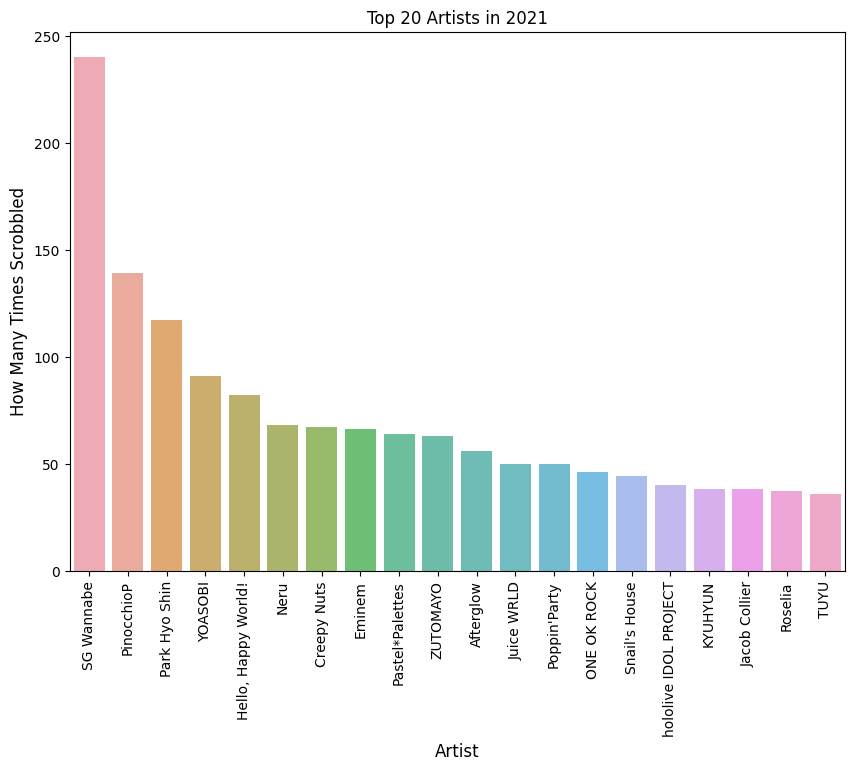

In [87]:
plt.figure(figsize=(10,7))
sns.barplot(top_20_2021_tl.index, top_20_2021_tl.values, alpha=0.8)
# plt.stem(top_20_2020_tl.index, top_20_2020_tl.values)
plt.title('Top 20 Artists in 2021')
plt.ylabel('How Many Times Scrobbled', fontsize=12)
plt.xticks(rotation=90)
plt.xlabel('Artist', fontsize=12)
plt.show()

In [88]:
print(counts_2021_tl[-5:, ])

Marika Takeuchi    1
fripSide           1
iroha(sasaki)      1
Lil Wayne          1
Joe Hisaishi       1
Name: artistName, dtype: int64
